In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import re
import nltk
from collections import Counter
import spacy
from spacy_langdetect import LanguageDetector
import string
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import scattertext as st
from scattertext import word_similarity_explorer
from IPython.display import IFrame
from pprint import pprint
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

from tqdm import tqdm, tqdm_notebook
tqdm_notebook().pandas()
pd.options.display.max_rows = 1000
pd.options.mode.chained_assignment = None

In [2]:
tweets = pd.read_csv('/Users/ramozo_88/Pot_Bot/data/customer-support-on-twitter/twcs/twcs.csv')
first_inbound = tweets[pd.isnull(tweets.in_response_to_tweet_id) & tweets.inbound]
df_question_response = pd.merge(first_inbound, tweets, left_on='tweet_id', 
                                  right_on='in_response_to_tweet_id')
df_question_response = df_question_response[df_question_response.inbound_y ^ True]
df_question_response = df_question_response[["author_id_x","created_at_x","text_x","author_id_y","created_at_y","text_y"]]
df_apple_question_response = df_question_response[df_question_response["author_id_y"]=="AppleSupport"]


In [127]:
df_question_response

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y
0,115712,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...
1,115712,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare,Tue Oct 31 21:46:14 +0000 2017,@115712 I would love the chance to review the ...
2,115712,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare,Tue Oct 31 21:45:59 +0000 2017,@115712 Hello! We never like our customers to ...
3,115713,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,sprintcare,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...
4,115715,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",sprintcare,Tue Oct 31 22:10:10 +0000 2017,@115715 Please send me a private message so th...
5,115716,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,Ask_Spectrum,Tue Oct 31 22:05:37 +0000 2017,@115716 The information pertaining to the acco...
6,115717,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",Ask_Spectrum,Tue Oct 31 22:12:09 +0000 2017,"@115717 Hello, My apologies for any frustratio..."
7,115718,Tue Oct 31 22:06:56 +0000 2017,My picture on @Ask_Spectrum pretty much every ...,Ask_Spectrum,Tue Oct 31 22:10:08 +0000 2017,@115718 I apologize for the inconvenience. I w...
8,115719,Tue Oct 31 22:10:46 +0000 2017,somebody from @VerizonSupport please help meee...,VerizonSupport,Tue Oct 31 22:13:33 +0000 2017,@115719 Help has arrived! We are sorry to see ...
9,115720,Tue Oct 31 22:12:16 +0000 2017,@VerizonSupport My friend is without internet ...,VerizonSupport,Tue Oct 31 22:13:30 +0000 2017,@115720 Have your friend message us.\n^ACM


In [4]:
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

punctuations = string.punctuation


nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS
stop_words = stop_words.union(set(apple_stop_words))

parser = English()

def spacy_tokenizer(sentence):
   
    mytokens = parser(sentence)

    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    return mytokens

In [3]:
apple_stop_words = ['applesupport', '115858', 'apple', 'https', 'gdrqu22ypt', 
                    'xxaxeesrt9', 'ibiy3vmgpj', '80yrnjdfdk', 'qodbosp4wz',
                   '116333', 'co', 've', '11', 'gdrqu2kzhr', 'etpvyvfyd8', '08olhchdnv'
                   '0abquuca1w', '10ypnthryf', '0jgzopoxcv', '1inv8mjbuc', '1j584kcilt', 
                    '1hqerbwkjv', '0pqh8fn3nu']

In [5]:

class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

def clean_text(text):
    return text.strip().lower()


In [6]:
bow_vector = CountVectorizer(max_features=1000, tokenizer = spacy_tokenizer, ngram_range=(1,1))

In [7]:
tfidf_vector = TfidfVectorizer(max_features=1000, tokenizer = spacy_tokenizer)

In [8]:
df_apple_question_response

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y
119,115856,Tue Oct 31 22:19:32 +0000 2017,Hey @AppleSupport and anyone else who upgraded...,AppleSupport,Tue Oct 31 22:26:29 +0000 2017,"@115856 Hey, let's work together to figure out..."
120,115857,Tue Oct 31 22:01:50 +0000 2017,Tf is wrong with my keyboard @115858,AppleSupport,Tue Oct 31 22:05:00 +0000 2017,"@115857 Fill us in on what is happening, then ..."
121,115859,Tue Oct 31 22:11:16 +0000 2017,@115858 @AppleSupport hello are all the lines ...,AppleSupport,Tue Oct 31 22:17:30 +0000 2017,@115859 What's going on? We're hapy to help if...
122,115861,Tue Oct 31 20:46:35 +0000 2017,"Hello, internet. Can someone explain why this ...",AppleSupport,Tue Oct 31 20:55:34 +0000 2017,@115861 You're in the right place; we'll do al...
123,115863,Tue Oct 31 22:16:40 +0000 2017,@AppleSupport I’ve got a screenshot saying my ...,AppleSupport,Tue Oct 31 22:22:31 +0000 2017,@115863 Go ahead and send us a DM please. Let ...
124,115864,Tue Oct 31 22:17:57 +0000 2017,Thank you @AppleSupport I updated my phone and...,AppleSupport,Tue Oct 31 22:22:00 +0000 2017,"@115864 We'd like to help, but we'll need more..."
125,115865,Tue Oct 31 18:08:04 +0000 2017,Hola @AppleSupport necesito urgente la actuali...,AppleSupport,Tue Oct 31 18:17:00 +0000 2017,@115865 We offer support via Twitter in Englis...
126,115866,Tue Oct 31 22:06:44 +0000 2017,@AppleSupport Hi! What is going on? Has Youtub...,AppleSupport,Tue Oct 31 22:18:28 +0000 2017,@115866 We want to help! DM us and let us know...
128,115868,Tue Oct 31 20:49:07 +0000 2017,MY HOME BUTTON DOESN’T WORK #IOS11 @AppleSupport,AppleSupport,Tue Oct 31 20:54:35 +0000 2017,@115868 Let us help with your Home button. Did...
129,115869,Tue Oct 31 22:10:06 +0000 2017,Hey @115858! Last time I downloaded an update ...,AppleSupport,Tue Oct 31 22:16:31 +0000 2017,@115869 We're here to help. Meet us in DM and ...


In [9]:
from sklearn.model_selection import train_test_split

X = df_apple_question_response['text_x'] 
ylabels = df_apple_question_response['text_y'] 

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)

In [ ]:
classifier = Kmeans(max_depth=2, random_state=0)

pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

pipe.fit(X_train,y_train)

/Users/ramozo_88/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ramozo_88/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [21]:
num_features = 1000

# LDA can only uses raw term counts
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=num_features, stop_words=stop_words)
tf = tf_vectorizer.fit_transform(X_train)

/Users/ramozo_88/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [26]:
num_topics = 12

# Run LDA
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=5, learning_method='online',random_state=0, n_jobs=-1)
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=12, n_jobs=-1,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [27]:
tf_feature_names = tf_vectorizer.get_feature_names()

In [28]:
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-num_top_words - 1:-1]]))

num_top_words = 15
display_topics(lda, tf_feature_names, num_top_words)

Topic 0:
ios11 wtf trying hi phone like pls seeing marks thanks hell iphone explain android look
Topic 1:
ios issue fix having battery updates issues turn update id didn guys yo pay hate
Topic 2:
time 10 ios phone fucking fuck shit upgrade sierra high tired randomly iphone try im
Topic 3:
battery iphone screen update phone life new day software want charge freezing come service amp
Topic 4:
help work music doesn ipad mac updating anymore hi password saying playing mode bullshit haven
Topic 5:
apps shit fix like getting dear macbook hours crashing download stupid problems lost good ago
Topic 6:
keeps phone tried right gonna support hello thank says button settings reset play cant freezing
Topic 7:
iphone hey 6s ios plus problem photos thing message weird notifications camera restart tell mail
Topic 8:
update phone new ios app iphone need working amp help latest store itunes old isn
Topic 9:
updated phone don wifi watch icloud use way bluetooth open minutes iphone send sucks turning
Topi

In [29]:
print("Model perplexity: {0:0.3f}".format(lda.perplexity(tf)))

Model perplexity: 649.326


In [30]:
num_features = 1000

# LDA can only uses raw term counts
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=num_features, stop_words=stop_words)
tf = tf_vectorizer.fit_transform(y_train)

/Users/ramozo_88/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [31]:
num_topics = 12

# Run LDA
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=5, learning_method='online',random_state=0, n_jobs=-1)
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=12, n_jobs=-1,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [32]:
tf_feature_names = tf_vectorizer.get_feature_names()

In [33]:
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-num_top_words - 1:-1]]))

num_top_words = 15
display_topics(lda, tf_feature_names, num_top_words)

Topic 0:
thanks reaching dm help model look experience closer thank iphone screen happy answer come started
Topic 1:
battery help important device working message life seeing iphone happens info specific type want assist
Topic 2:
reach link help right team best need fi wi happen workaround following itunes great photos
Topic 3:
love help able want expected mac iphone letting id important long enjoy like touch trying
Topic 4:
update ios sure device issue let updating released issues recently fix 4f8hwt5to6 backup autocorrect follow
Topic 5:
help issues article having steps iphone check want dm issue tell like certainly new try
Topic 6:
let know dm look iphone help ll going work device find like start country tried
Topic 7:
ios version gt settings running help iphone general currently started installed dm device look exact
Topic 8:
support help join twitter english offer contact available language preferred glad spanish oczyrx7ios hello lnmcdqt6fd
Topic 9:
work issue software update fixe

In [34]:
print("Model perplexity: {0:0.3f}".format(lda.perplexity(tf)))

Model perplexity: 167.540


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [46]:
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(X_train)

/Users/ramozo_88/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [47]:
true_k = 13
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=13, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [48]:
top_centroids = model.cluster_centers_.argsort()[:,-1:-11:-1]
terms = vectorizer.get_feature_names()
print('Top features (words) for each cluster:')
for num, centroid in enumerate(top_centroids):
    print("Cluster%d: %s" % (num, ", ".join(terms[i] for i in centroid)))
    


Top features (words) for each cluster:
Cluster0: phone, updated, ios, new, shit, fix, wtf, updates, fucking, fuck
Cluster1: question, mark, marks, box, boxes, fix, seeing, letter, updated, shit
Cluster2: keeps, freezing, phone, iphone, crashing, update, ios, help, restarting, new
Cluster3: like, phone, fix, iphone, update, shit, looks, new, ios, look
Cluster4: ios, wtf, hey, letter, type, ios11, time, going, shit, fix
Cluster5: update, phone, new, ios, iphone, fix, latest, thanks, slow, software
Cluster6: music, app, store, ios, 115948, download, update, open, podcast, fix
Cluster7: fix, glitch, shit, issue, letter, going, gonna, need, annoying, hey
Cluster8: apps, update, ios, phone, download, iphone, crashing, freezing, open, new
Cluster9: problem, fix, going, update, having, gonna, iphone, fixed, phone, hey
Cluster10: iphone, ios, plus, new, 6s, screen, ios11, phone, fix, updated
Cluster11: help, need, iphone, phone, ios, hi, pls, won, updated, update
Cluster12: battery, life, ios, 

In [97]:
Y = vectorizer.transform(X_test)
prediction = model.predict(Y)
print(prediction)

[ 3  4 10 ...  0  5  5]


In [49]:
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(y_train)

/Users/ramozo_88/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [50]:
true_k = 13
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=13, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [51]:
top_centroids = model.cluster_centers_.argsort()[:,-1:-11:-1]
terms = vectorizer.get_feature_names()
print('Top features (words) for each cluster:')
for num, centroid in enumerate(top_centroids):
    print("Cluster%d: %s" % (num, ", ".join(terms[i] for i in centroid)))
    


Top features (words) for each cluster:
Cluster0: reaching, thanks, dm, help, workaround, look, need, send, happy, continue
Cluster1: future, fixed, software, update, work, issue, uqexsrrlxj, xxaxefaskh, evcqp6kgpj, tqme2m68en
Cluster2: let, know, dm, help, look, ll, device, iphone, like, issues
Cluster3: help, dm, iphone, like, device, tell, happy, app, look, love
Cluster4: reach, team, look, dm, happy, ll, 8yjrd1xo0i, started, help, detail
Cluster5: want, dm, help, experience, iphone, ll, send, certainly, look, sure
Cluster6: details, dm, ll, like, help, send, experiencing, look, issues, iphone
Cluster7: version, ios, dm, iphone, running, help, let, look, installed, device
Cluster8: gt, general, settings, version, ios, running, check, find, help, currently
Cluster9: dm, ll, send, look, like, continue, happy, started, help, meet
Cluster10: english, twitter, support, offer, preferred, language, contact, join, spanish, help
Cluster11: steps, article, help, check, xu1aghstv6, try, let, qu

In [102]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [107]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

/Users/ramozo_88/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


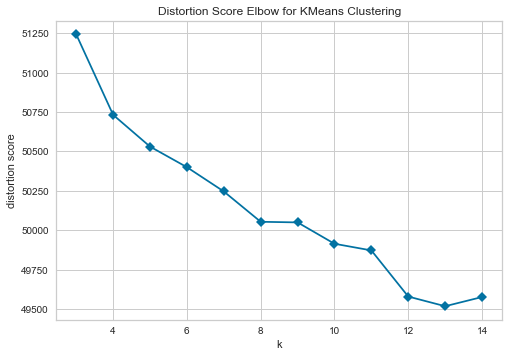

In [44]:
from yellowbrick.cluster import KElbowVisualizer

vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(X_train)
model = KMeans(init='k-means++', max_iter=100, n_init=1)
visualizer = KElbowVisualizer(model, k=(3,15), timings=False, locate_elbow=False )

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show(outpath='/Users/ramozo_88/Twitter_Bot/images/kmeans_elbow_graph.PNG') 

/Users/ramozo_88/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


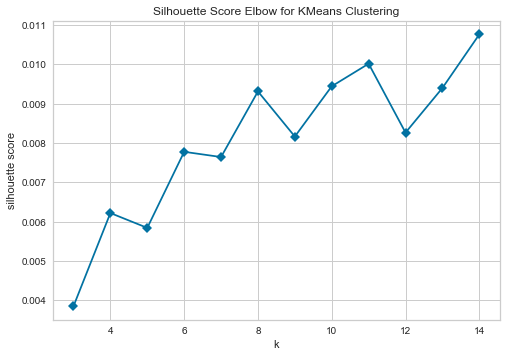

In [45]:
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(X_train)
model = KMeans(init='k-means++', max_iter=100, n_init=1)
visualizer = KElbowVisualizer(model, k=(3,15), metric='silhouette', timings=False, locate_elbow=False)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show(outpath='/Users/ramozo_88/Twitter_Bot/images/kmeans_elbow_graph_silhouette.PNG') 

Top features (words) for each cluster:
Cluster0: screen, lock, iphone, black, ios, phone, update, home, touch, fix
Cluster1: iphone, ios, plus, new, 6s, ios11, phone, update, working, keeps
Cluster2: fix, shit, glitch, problem, letter, gonna, thing, annoying, damn, bug
Cluster3: fucking, phone, fix, shit, update, new, fuck, iphone, stop, ios
Cluster4: help, iphone, phone, ios, hi, pls, keeps, update, new, updated
Cluster5: ios, app, ios11, fix, shit, like, working, letter, store, bug
Cluster6: time, type, phone, update, iphone, ios, try, new, fix, letter
Cluster7: wtf, phone, shit, going, iphone, update, like, letter, fix, ios
Cluster8: boxes, seeing, question, marks, updated, mark, phone, fix, tired, update
Cluster9: battery, life, ios, update, iphone, draining, new, fix, phone, fast
Cluster10: email, received, got, address, account, scam, order, id, send, help
Cluster11: update, phone, new, ios, iphone, fix, latest, apps, slow, thanks
Cluster12: hey, fix, update, phone, ios, iphone, 